In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import rendering

In [167]:
rendering.set_font(size=25)

In [172]:
n_points = 5000
num_divs = np.array([512, 512, 512])
num_divs_2 = num_divs // 2
three_d = True

In [108]:
def plot_points(point_cloud, point_size=3, three_d=True, size=512):
    fig = plt.figure(figsize=(10,10))
    if three_d:
        ax = fig.add_subplot(111, projection = '3d')
        ax.scatter([p[0] for p in point_cloud], [p[1] for p in point_cloud], [p[2] for p in point_cloud], s=point_size)
    else:
        ax = fig.add_subplot(111)
        ax.scatter([p[0] for p in point_cloud], [p[1] for p in point_cloud], s=point_size)
    # limits    
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    if three_d:
        ax.set_zlim(0, size)
    return ax
    
def plot_point(point, point_size=3, ax=None, three_d=True):
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        if three_d:
            ax = fig.add_subplot(111, projection = '3d')
        else:
            ax = fig.add_subplot(111)
            
    if three_d:
        ax.scatter(point[0], point[1], point[2], s=point_size, c='r', zorder=10)
    else:
        # place in front of the plot
        ax.scatter(point[0], point[1], s=point_size, c='r', zorder=10)
    return ax

In [127]:
# generate n random points within a 3d sphere
def get_random_point(n_divs):
    # random 3d point over the surface of a sphere
    theta = random.uniform(0, 2*np.pi)
    phi = random.uniform(0, np.pi)
    r = n_divs[0] // 2
    p = np.array([r*np.sin(phi)*np.cos(theta), r*np.sin(phi)*np.sin(theta), r*np.cos(phi)])
    return p + n_divs // 2

def generate_sphere_points(n, r):
    points = []
    while len(points) < n:
        points.append(get_random_point(r))
    return points

<Axes3D: >

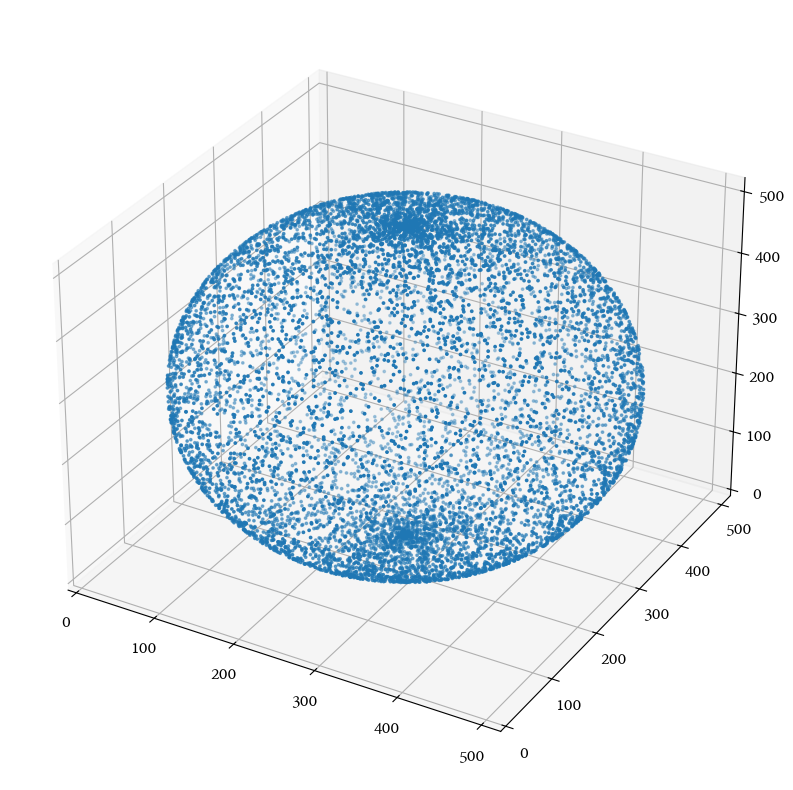

In [129]:
points = generate_sphere_points(n_points, num_divs)

# plot
plot_points(points, three_d=three_d)

In [224]:
def get_biased_random_int(max_value, spreading):
    max_value /= spreading
    random_coord = 0
    
    for i in range(spreading):
        random_coord += random.uniform(0, max_value)
        
    return random_coord

def get_biased_samples(p, n, n_divs, spreading=5):
    points = []
    n_divs_2 = n_divs // 2
    
    while len(points) < n:
        x = n_divs_2[0] - get_biased_random_int(n_divs[0], spreading)
        y = n_divs_2[1] - get_biased_random_int(n_divs[1], spreading)
        z = n_divs_2[2] - get_biased_random_int(n_divs[2], spreading)
        
        x = int(p[0] + x + n_divs[0]) % n_divs[0]
        y = int(p[1] + y + n_divs[1]) % n_divs[1]
        z = int(p[2] + z + n_divs[2]) % n_divs[2]
        
        # distance to p
        dist = np.linalg.norm(np.array([x, y, z]) - p)
        if dist < n_divs[0] // 2:
            # inside sphere
            points.append([x, y, z])
        
    return points

def get_biased_random_int_sequence(max_value, spreading):
    max_value /= spreading
    random_coord = 0
    buffer = []
    
    for i in range(spreading):
        random_coord += random.uniform(0, max_value)
        buffer.append(random_coord)
        
    return buffer

In [225]:
sampled_point = get_random_point(num_divs)

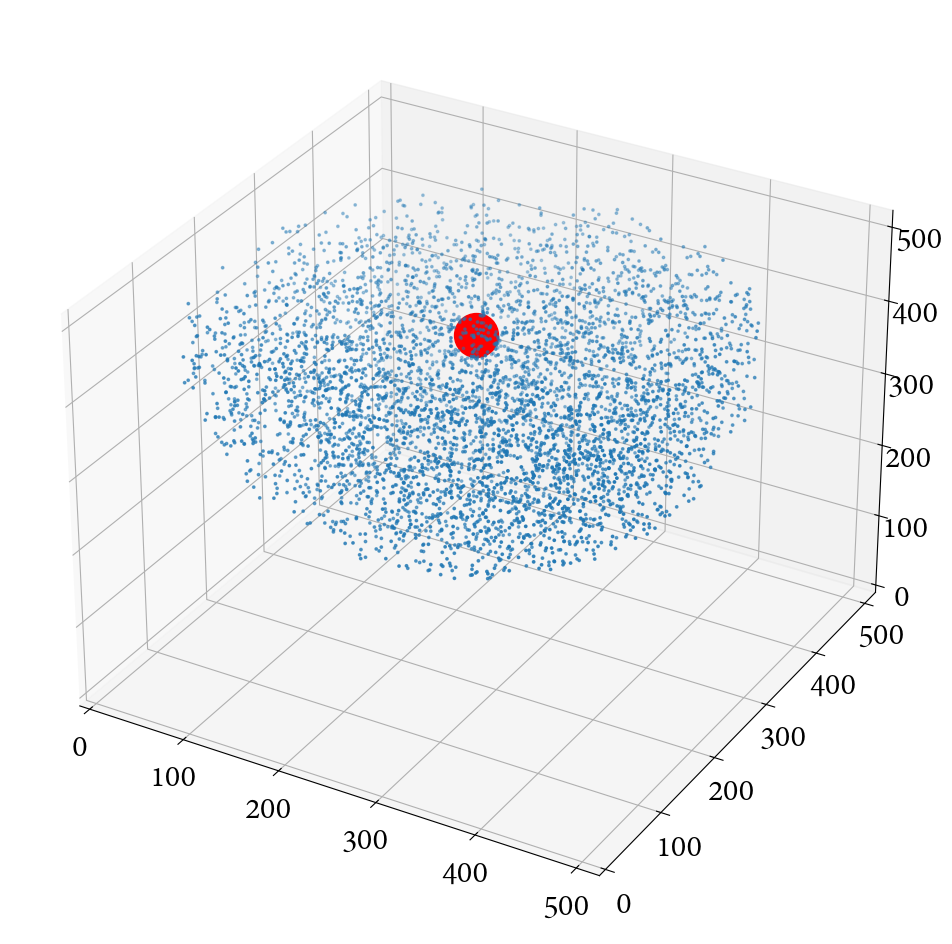

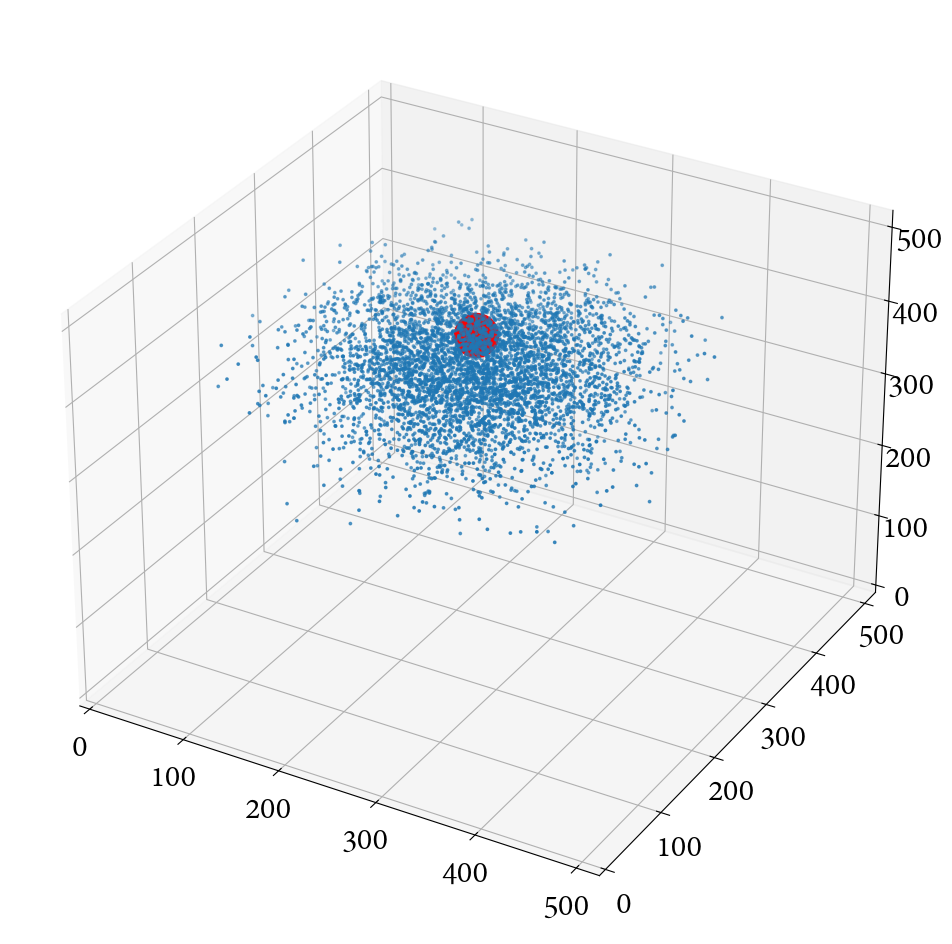

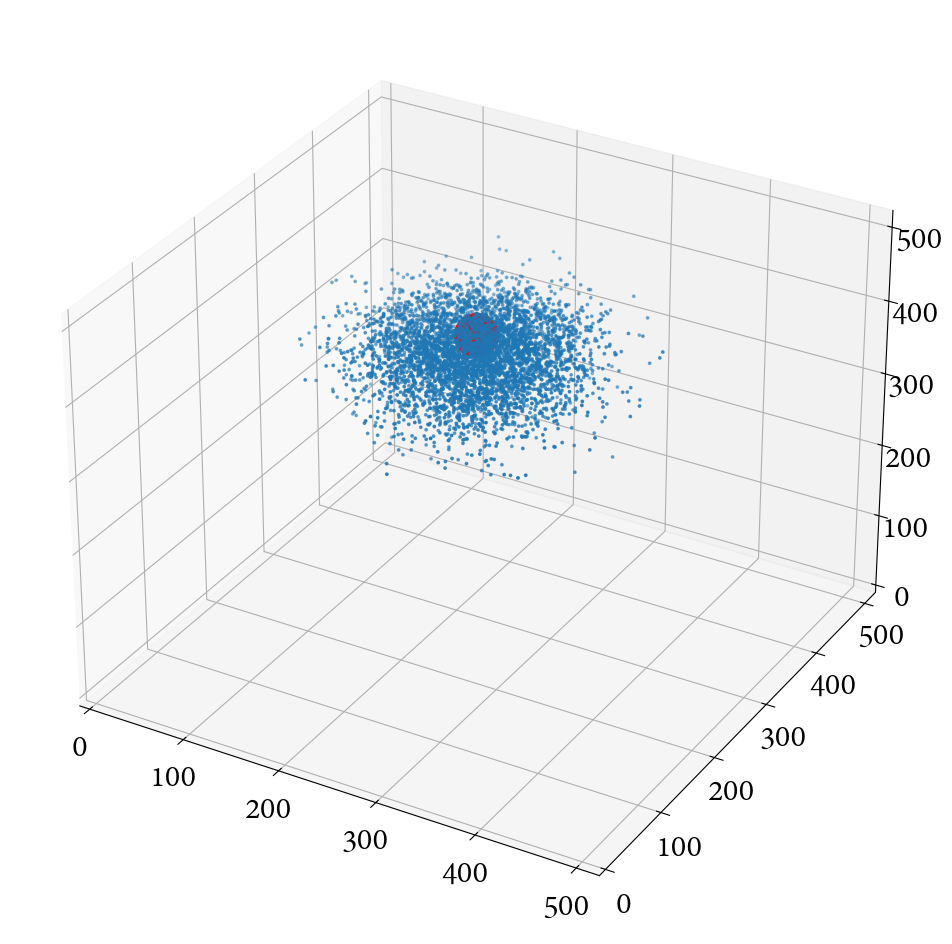

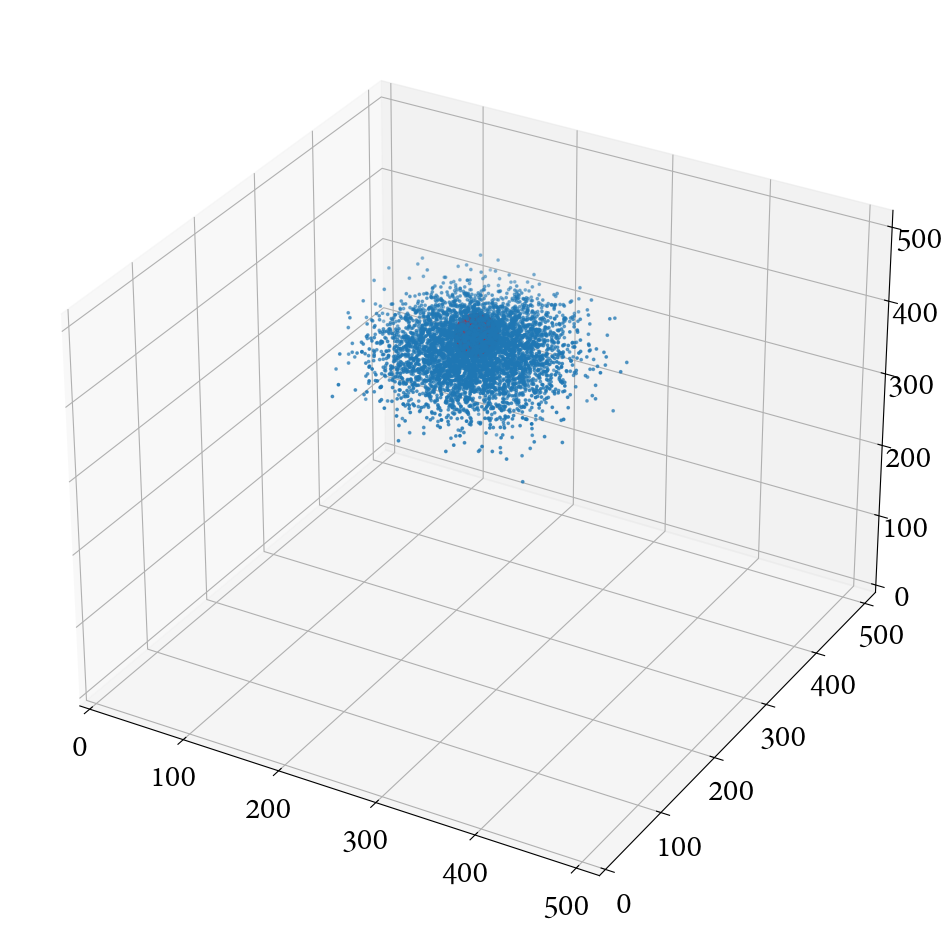

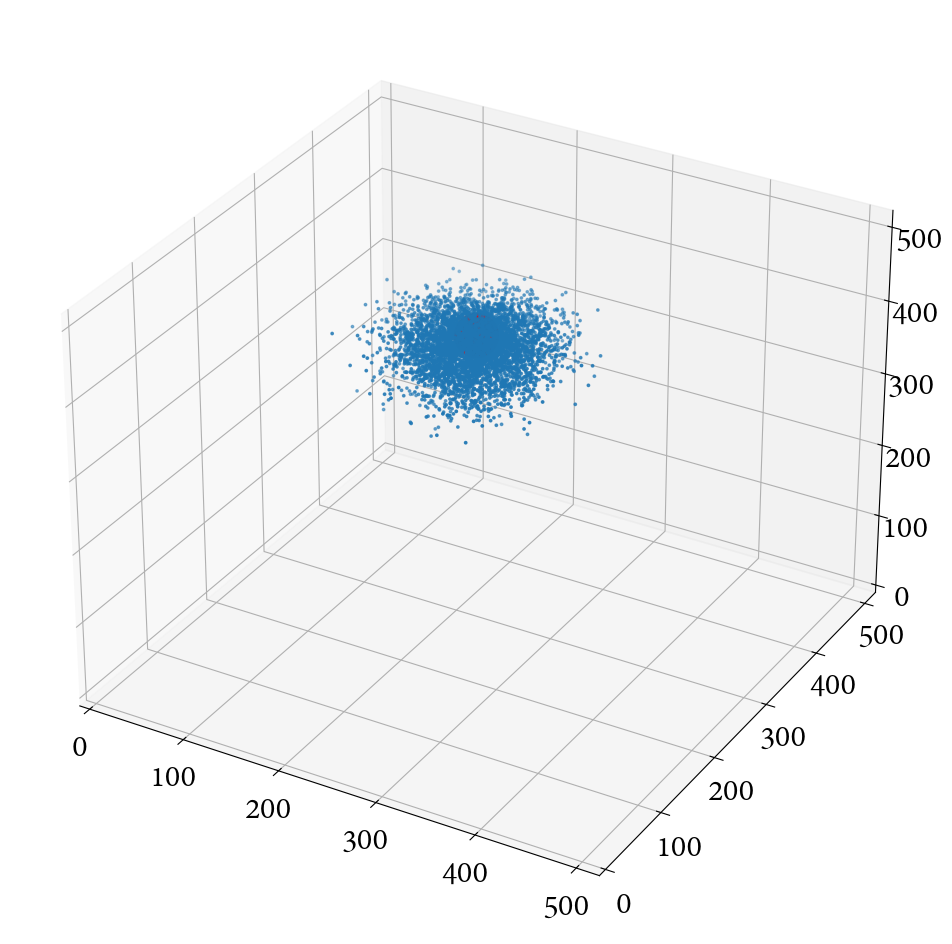

In [226]:
# plot
# new seed
for i in [1, 5, 10, 15, 20]:
    random.seed(0)
    points = get_biased_samples(sampled_point, n_points, num_divs, spreading=i)
    ax = plot_points(points, three_d=three_d, size=num_divs[0])
    ax = plot_point(sampled_point, ax=ax, point_size=1000, three_d=three_d)
    # plt.title('Spreading = {}'.format(i))
    plt.tight_layout()
    plt.savefig('results/biased_samples_{}.png'.format(i), dpi=500, transparent=True)

[3.222355805837117, 7.993579363084109, 10.856723683678583, 12.600495910294384, 13.706382010808607, 14.779321345479254, 15.242921715687597, 16.135907024861613, 17.74220354536496, 20.77737879622737, 25.852674940104137, 27.786210145399995, 29.401117294209982, 32.817715648826685, 37.460221295748994, 41.116305273614515, 45.03292076659897, 49.79740925519672, 49.86571997366277, 52.5436054140106, 53.26552109118245, 56.64309455091807, 59.699428069588954, 61.485275846108934, 61.99922567964024, 62.907519584547785, 67.67404204077822, 68.99806042705326, 72.35813796548194, 77.15698073905605, 81.39746504288887, 81.9242390471796, 86.6227714423438, 88.7454582729992, 90.61332608214329, 95.11464837007875, 97.77820313287555, 100.14664695890397, 102.28159799233048, 106.66423428540381, 110.42159828186716, 110.54008049286813, 113.12493610017002, 117.94135513800109, 121.97024453008001, 124.70137526340062, 127.85015477068036, 129.37891022658917, 134.43976330281106, 135.73857054028338, 138.65106814537472, 141.9

C:\Users\AlfonsoLópezRuiz\AppData\Local\Temp\ipykernel_21116\2137256339.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


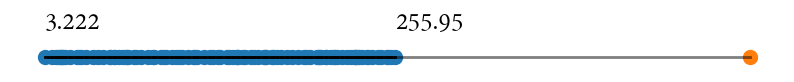

In [231]:
# get sequence of random biased points
points = get_biased_random_int_sequence(num_divs[0], spreading=100)
print(points)

# plot
plt.figure(figsize=(10,0.4))
# draw points over a linear axis
plt.plot(points, np.zeros(len(points)), 'o', markersize=10)
# plot lines
for i in range(len(points)-1):
    plt.plot([points[i], points[i+1]], [0, 0], 'k-', linewidth=2)
# plot text of first and last point with 2 decimals
first_point_str = str(points[0])[:5]
last_point_str = str(points[-1])[:6]
plt.text(points[0], 0.1, first_point_str, fontsize=20)
plt.text(points[-1], 0.1, last_point_str, fontsize=20)
# new point at num_divs[0]
plt.plot(num_divs[0], 0, 'o', markersize=10)
# new line with alpha
plt.plot([points[-1], num_divs[0]], [0, 0], 'k-', linewidth=2, alpha=0.5)
plt.tight_layout()
plt.axis('off')
plt.savefig('results/biased_samples_sequence.png', dpi=500, transparent=True)
plt.show()